In [22]:
from __future__ import absolute_import, division, print_function

from psychopy import visual, core, event, gui, data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Experiment Prompt

In [ ]:
myDlg = gui.Dlg(title = 'Visuomotor Adaptation')
myDlg.addField('Participant Number: ')
ok_data = myDlg.show()  # show dialog and wait for OK or Cancel
if myDlg.OK:  # or if ok_data is not None
    print(ok_data)
else:
    print('user cancelled')

In [97]:
my_win = visual.Window((1920, 1080), allowGUI=True, fullscr = True, color = [0, 0, 0])
outer = visual.Circle(my_win, edges=64, size = (1.1, 1.87), pos = [0, 0], fillColor = [0, 0, 0], lineColor = [1, -1, -1], autoDraw = True)
outer.draw()
inner = visual.Circle(my_win, edges=64, size = (0.9, 1.53), pos = [0, 0], fillColor = [0, 0, 0], lineColor = [1, -1, -1], autoDraw = True)
inner.draw()
fixation = visual.Circle(my_win, edges=64, size = (0.03, 0.05), pos = [0, 0], fillColor = [1, 0, 0], lineColor = [1, 0, 0], autoDraw = True)
fixation.draw()

target = visual.Polygon(my_win, edges=4, size = (0.1, 0.17), pos = [0.5*np.cos(np.pi/4), 0.85*np.sin(np.pi/4)], fillColor = [0, 1, 0], lineColor = [0, 1, 0], autoDraw = True)
target.draw()
my_win.update()
core.wait(2)
my_win.close()

14521.2899 	WARNING 	Monitor specification not found. Creating a temporary one...
14521.2916 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1280, 720]. Using actual size


In [66]:
def run_blocks(block_no, rotation, thetas):

    target_position_thetas = np.array([np.random.permutation(thetas), np.random.permutation(thetas), np.random.permutation(thetas), np.random.permutation(thetas)])
    target_angle_pos = np.ravel(target_position_thetas)
    target_pos_radius = 0.75
    target_xpos = 0.5*np.cos(target_angle_pos)
    target_ypos = 0.85*np.sin(target_angle_pos)
    num_trials = len(target_angle_pos)
    # Create a window to draw in
    my_win = visual.Window((1920, 1080), allowGUI=True, fullscr = True)
    
      
    #Center fixation
    outer = visual.Circle(my_win, edges=64, size = (1.1, 1.87), pos = [0, 0], fillColor = [0, 0, 0], lineColor = [1, -1, -1])
    outer.draw()
    inner = visual.Circle(my_win, edges=64, size = (0.9, 1.53), pos = [0, 0], fillColor = [0, 0, 0], lineColor = [1, -1, -1])
    inner.draw()
    fixation = visual.Circle(my_win, edges=64, size = (0.03, 0.05), pos = [0, 0], fillColor = [1, 0, 0], lineColor = [1, 0, 0])
    fixation.draw()

    #Initialize Variables to return
    rotated_traj_x = np.empty(num_trials, dtype = object)
    rotated_traj_y = np.empty(num_trials, dtype = object)
    initial_time = np.zeros(num_trials)
    movement_time = np.zeros(num_trials)
    target_hit = np.zeros(num_trials)
    

    for trial in range(num_trials):
        traj_x = list()
        traj_y = list()
        #outer.draw()
        #inner.draw()
        #fixation.draw()
        #my_win.update()
        #isi
        core.wait(np.random.normal(0.75, 1))
        #Go Target
        target = visual.Polygon(my_win, edges=4, size = (0.1, 0.17), pos = [target_xpos[trial], target_ypos[trial]], fillColor = [0, 1, 0], lineColor = [0, 1, 0])
        target.draw()            
        my_win.update()
        #Initialize mouse object
        my_mouse = event.Mouse(visible=False,newPos=[0,0],win=my_win)
        #my_win.update()
        clock_it = core.Clock()
        clock_mt = core.Clock()
        my_mouse.clickReset()
        first_flag = True
        while True:
            #Get current mouse position
            #mouse_x, mouse_y = my_mouse.getPos()

            if my_mouse.getPressed()[0]:
                if first_flag:
                    mouse_x, mouse_y = my_mouse.getPos()

                    initial_time[trial] = clock_it.getTime()
                    x_center = mouse_x
                    y_center = mouse_y
                    #fixation.pos = (0, 0)
                    #fixation.draw()
                    #target.draw()
                    #my_win.update()
                    first_flag = False
                    #print (x_center, y_center)

                mouse_x, mouse_y = my_mouse.getPos()
                cursor_x = (mouse_x-x_center)*np.cos(rotation) + (mouse_y-y_center)*np.sin(rotation)
                cursor_y = -(mouse_x-x_center)*np.sin(rotation) + (mouse_y-y_center)*np.cos(rotation)
                #Change the position of the fixation to the rotated movement from the mouse
                try:
                    fixation.pos = [cursor_x[0], cursor_y[0]]
                    traj_x.append(cursor_x[0])
                    traj_y.append(cursor_y[0])
                except:
                    fixation.pos = [cursor_x, cursor_y]
                    traj_x.append(cursor_x)
                    traj_y.append(cursor_y)

                #Draw on screen
                fixation.opacity = 0
                outer.draw()
                inner.draw()
                fixation.draw()
                target.draw()

                #Display on Screen
                my_win.update()

                #Break if fixation reaches the target
                if visual.helpers.polygonsOverlap(fixation, outer) and not visual.helpers.polygonsOverlap(fixation, inner):
                    movement_time[trial] = clock_mt.getTime()
                    target_hit[trial] = visual.helpers.polygonsOverlap(fixation, target)
                    fixation.opacity = 1
                    outer.draw()
                    inner.draw()
                    fixation.draw()
                    target.draw()
                    my_win.update()
                    core.wait(0.3)
                    fixation.pos = [0, 0]
                    fixation.draw()
                    
                    #Store Trajectory
                    #print (traj_x)
                    rotated_traj_x[trial] = traj_x
                    #print ('Here')
                    #print (rotated_traj_x)
                    rotated_traj_y[trial] = traj_y
                    break
                #print(rotated_traj_x)
            else:
                traj_x = list()
                traj_y = list()
                fixation.pos = [0, 0]
                outer.draw()
                inner.draw()
                fixation.draw()
                clock_it = core.Clock()
                clock_mt = core.Clock()
                first_flag = True
                target.draw()
                my_mouse.setPos([0, 0])
                
                my_win.update()

        #return fixation back to center
        fixation.fillColor = [1, 0, 0]
        fixation.lineColor = [1, 0, 0]
        fixation.pos = [0, 0]
        outer.draw()
        inner.draw()
        fixation.draw()
        my_win.update()

    core.wait(1.0)

    actual_traj = np.array([rotated_traj_x, rotated_traj_y])
    #Cleanup
    my_win.close()
    #core.quit()
    return (target_angle_pos, actual_traj, initial_time, movement_time, target_hit)



In [67]:
thetas = np.repeat(np.array([7*np.pi/4]), 1)
run_blocks(0, 0, thetas)

11340.6387 	WARNING 	Monitor specification not found. Creating a temporary one...
11340.6402 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1920, 1200]. Using actual size


(array([5.49778714, 5.49778714, 5.49778714, 5.49778714]),
 array([[list([0.0, 0.0031250000000000167, 0.0062500000000000056, 0.011458333333333348, 0.016666666666666663, 0.021875000000000006, 0.029166666666666674, 0.03541666666666668, 0.040624999999999994, 0.044791666666666674, 0.048958333333333326, 0.05520833333333333, 0.060416666666666674, 0.06458333333333333, 0.06875, 0.07291666666666666, 0.07604166666666667, 0.07916666666666666, 0.08333333333333334, 0.08645833333333333, 0.08854166666666666, 0.09166666666666667, 0.09479166666666666, 0.09791666666666668, 0.1, 0.10208333333333333, 0.10520833333333335, 0.109375, 0.1125, 0.11666666666666667, 0.11979166666666667, 0.12291666666666667, 0.12604166666666666, 0.128125, 0.13125, 0.13333333333333333, 0.13645833333333335, 0.140625, 0.14375, 0.14895833333333333, 0.15208333333333335, 0.15520833333333334, 0.15833333333333333, 0.16041666666666665, 0.16354166666666667, 0.16666666666666669, 0.16979166666666667, 0.171875, 0.175, 0.178125, 0.18125, 0.1833

# Experiment

In [68]:
total_blocks = 13
targets = np.empty(total_blocks, dtype = object)
actual_traj = np.empty(total_blocks, dtype = object)
initial_time = np.empty(total_blocks, dtype = object)
movement_time = np.empty(total_blocks, dtype = object)
target_hit = np.empty(total_blocks, dtype = object)

random_thetas = np.random.choice(np.array([np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4]), 3 ,replace = False)
learning_thetas = np.repeat(random_thetas, 4)           
learning_rotation = np.array([0, 0.1*np.pi/2, 0.2*np.pi/2, 0.3*np.pi/2, 0.4*np.pi/2, 0.5*np.pi/2, 0.6*np.pi/2, 0.7*np.pi/2, 0.8*np.pi/2, 0.9*np.pi/2, np.pi/2, np.pi/2])

thetas = np.repeat(np.array([np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4]), 4)


In [69]:
#baseline
targets[0], actual_traj[0], initial_time[0], movement_time[0], target_hit[0] = run_blocks(0, 0, thetas)

#Training
for block_no in range(1, 11):
        targets[block_no], actual_traj[block_no], initial_time[block_no], movement_time[block_no], target_hit[block_no] = run_blocks(block_no, learning_rotation[block_no], learning_thetas)
#Test
targets[11], actual_traj[11], initial_time[11], movement_time[11], target_hit[11] = run_blocks(11, learning_rotation[11], thetas)    
#Transfer
targets[12], actual_traj[12], initial_time[12], movement_time[12], target_hit[12] = run_blocks(12, 0, thetas)
    

11462.8869 	WARNING 	Monitor specification not found. Creating a temporary one...
11462.8886 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1920, 1200]. Using actual size
11637.6694 	WARNING 	Monitor specification not found. Creating a temporary one...
11637.6753 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1920, 1200]. Using actual size
11749.0144 	WARNING 	Monitor specification not found. Creating a temporary one...
11749.0189 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1920, 1200]. Using actual size
11858.3018 	WARNING 	Monitor specification not found. Creating a temporary one...
11858.3059 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1920, 1200]. Using actual size
11971.9331 	WARNING 	Monitor specification not found. Creating a temporary one...
11971.9387 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actual

In [8]:
targets[10]

array([2.35619449, 3.92699082, 2.35619449, 2.35619449, 5.49778714,
       5.49778714, 3.92699082, 3.92699082, 3.92699082, 5.49778714,
       2.35619449, 5.49778714, 2.35619449, 2.35619449, 2.35619449,
       3.92699082, 3.92699082, 5.49778714, 2.35619449, 5.49778714,
       5.49778714, 3.92699082, 5.49778714, 3.92699082, 2.35619449,
       5.49778714, 2.35619449, 3.92699082, 5.49778714, 3.92699082,
       2.35619449, 2.35619449, 5.49778714, 3.92699082, 3.92699082,
       5.49778714, 3.92699082, 3.92699082, 5.49778714, 2.35619449,
       5.49778714, 3.92699082, 5.49778714, 2.35619449, 5.49778714,
       3.92699082, 2.35619449, 2.35619449])

# Save the data

In [ ]:
import os

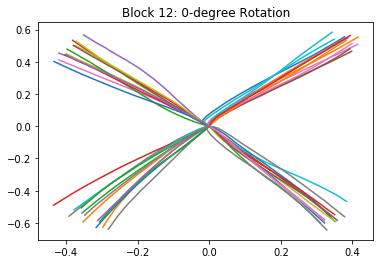

In [105]:
block = 12
for i in range(48):
    plt.plot(actual_traj[block][0, i], actual_traj[block][1, i])
    plt.title('Block ' + str(block) + ': ' + str(block*10*0) +'-degree Rotation')

In [39]:
import os
import pandas as pd

In [75]:
os.makedirs("testing_generalization\\data\\pilot\\4002")

In [76]:
np.save("testing_generalization/data/pilot/4002/targets.npy", targets)
np.save("testing_generalization/data/pilot/4002/actual_traj.npy", actual_traj)
np.save("testing_generalization/data/pilot/4002/initial_time.npy", initial_time)
np.save("testing_generalization/data/pilot/4002/movement_time.npy", movement_time)
np.save("testing_generalization/data/pilot/4002/target_hit.npy", target_hit)

In [156]:
df = pd.DataFrame({"targets":targets, "actual_traj":actual_traj, "initial_time":initial_time, "movement_time": movement_time, "target_hit":target_hit})

In [78]:
df.to_csv("testing_generalization/data/pilot/4002/data4002.csv")

In [139]:
targets = np.load("testing_generalization/data/pilot/4001/targets.npy", allow_pickle = True)
actual_traj = np.load("testing_generalization/data/pilot/4001/actual_traj.npy", allow_pickle = True)
initial_time = np.load("testing_generalization/data/pilot/4001/initial_time.npy", allow_pickle = True)
movement_time = np.load("testing_generalization/data/pilot/4001/movement_time.npy", allow_pickle = True)
target_hit = np.load("testing_generalization/data/pilot/4001/target_hit.npy", allow_pickle = True)

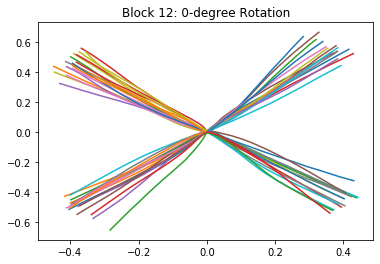

In [154]:
block = 12
for i in range(64):
    plt.plot(actual_traj[block][0, i], actual_traj[block][1, i])
    plt.title('Block ' + str(block) + ': 0-degree Rotation')